# Non Local Means vs Bilateral Filter

#### @uthors : Leo Alberge & Matthieu Toulemont
#### Project at Ecole des Ponts, Paris, France

In [92]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.restoration import denoise_nl_means,denoise_bilateral
from skimage.color import rgb2gray
from skimage.util.shape import view_as_windows

from scipy import misc
import itertools
import scipy.stats as st


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/restoration/_denoise.py:107: skimage_deprecation: `sigma_range` has been deprecated in favor of `sigma_color`. The `sigma_range` keyword argument will be removed in v0.14
  'will be removed in v0.14', skimage_deprecation)


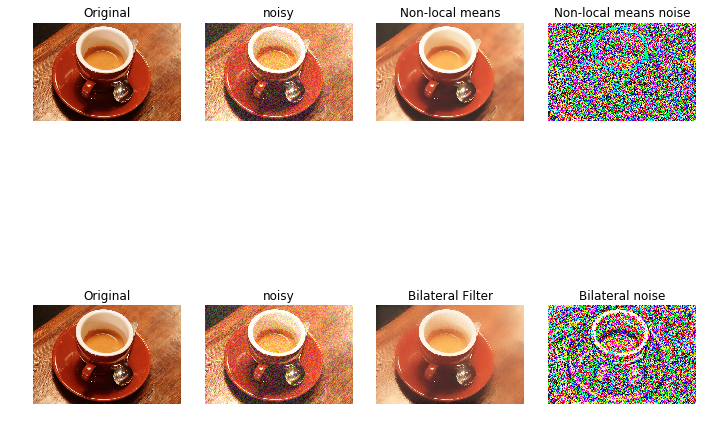

In [29]:
coffee = img_as_float(data.coffee())

noisy = astro + 0.3 * np.random.random(astro.shape)
noisy = np.clip(noisy, 0, 1)
denoise_nl = denoise_nl_means(noisy, 7, 9, 0.08, multichannel=True)
denoise_bf = denoise_bilateral(noisy, sigma_range = 0.1, sigma_spatial = 15, multichannel = True)

fig, ax = plt.subplots(nrows = 2,ncols=4, figsize=(10, 10), sharex=True, sharey=True,
                       subplot_kw={'adjustable': 'box-forced'})
ax[0, 0].imshow(astro)
ax[0, 0].axis('off')
ax[0, 0].set_title('Original')
ax[0, 1].imshow(noisy)
ax[0, 1].axis('off')
ax[0, 1].set_title('noisy')
ax[0, 2].imshow(denoise_nl)
ax[0, 2].axis('off')
ax[0, 2].set_title('Non-local means')
ax[0, 3].imshow(denoise_nl - noisy)
ax[0, 3].axis('off')
ax[0, 3].set_title('Non-local means noise')

ax[1, 0].imshow(astro)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')
ax[1, 1].imshow(noisy)
ax[1, 1].axis('off')
ax[1, 1].set_title('noisy')
ax[1, 2].imshow(denoise_bf)
ax[1, 2].axis('off')
ax[1, 2].set_title('Bilateral Filter')
ax[1, 3].imshow(denoise_bf - noisy)
ax[1, 3].axis('off')
ax[1, 3].set_title('Bilateral noise')

fig.tight_layout()

plt.show()

In [161]:
misc.imsave("images/coffee/coffee.png", coffee)
misc.imsave("images/coffee/coffeenoise.png", noisy)
misc.imsave("images/coffee/coffee_nl.png", denoise_nl)
misc.imsave("images/coffee/coffee_bf.png", denoise_bf)
misc.imsave("images/coffee/coffee_nl_noise.png", denoise_nl - coffee)
misc.imsave("images/coffee/coffee_bf_noise.png", denoise_bf - coffee)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/restoration/_denoise.py:107: skimage_deprecation: `sigma_range` has been deprecated in favor of `sigma_color`. The `sigma_range` keyword argument will be removed in v0.14
  'will be removed in v0.14', skimage_deprecation)


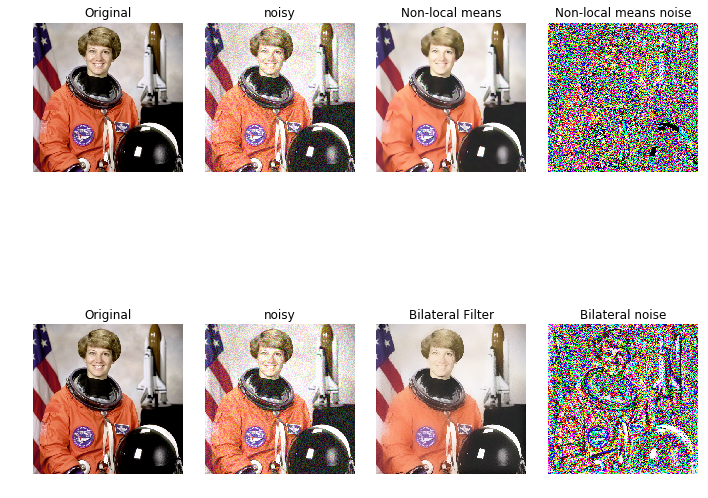

In [36]:
astro = img_as_float(data.astronaut())

astronoisy = astro + 0.3 * np.random.random(astro.shape)
astronoisy = np.clip(astronoisy, 0, 1)
astrodenoise_nl = denoise_nl_means(astronoisy, 7, 9, 0.08, multichannel=True)
astrodenoise_bf = denoise_bilateral(astronoisy, sigma_range = 0.1, sigma_spatial = 15, multichannel = True)

fig2, ax2 = plt.subplots(nrows = 2,ncols=4, figsize=(10, 10), sharex=True, sharey=True,
                       subplot_kw={'adjustable': 'box-forced'})
ax2[0, 0].imshow(astro)
ax2[0, 0].axis('off')
ax2[0, 0].set_title('Original')
ax2[0, 1].imshow(astronoisy)
ax2[0, 1].axis('off')
ax2[0, 1].set_title('noisy')
ax2[0, 2].imshow(astrodenoise_nl)
ax2[0, 2].axis('off')
ax2[0, 2].set_title('Non-local means')
ax2[0, 3].imshow(astrodenoise_nl - astronoisy)
ax2[0, 3].axis('off')
ax2[0, 3].set_title('Non-local means noise')

ax2[1, 0].imshow(astro)
ax2[1, 0].axis('off')
ax2[1, 0].set_title('Original')
ax2[1, 1].imshow(astronoisy)
ax2[1, 1].axis('off')
ax2[1, 1].set_title('noisy')
ax2[1, 2].imshow(astrodenoise_bf)
ax2[1, 2].axis('off')
ax2[1, 2].set_title('Bilateral Filter')
ax2[1, 3].imshow(astrodenoise_bf - astronoisy)
ax2[1, 3].axis('off')
ax2[1, 3].set_title('Bilateral noise')

fig2.tight_layout()

plt.show()

In [162]:
misc.imsave("images/astro/astro.png", astro)
misc.imsave("images/astro/astronoise.png", astronoisy)
misc.imsave("images/astro/astro_nl.png", astrodenoise_nl)
misc.imsave("images/astro/astro_bf.png", astrodenoise_bf)
misc.imsave("images/astro/astro_nl_noise.png", astrodenoise_nl - astro)
misc.imsave("images/astro/astro_bf_noise.png", astrodenoise_bf - astro)

## Results

On both examples the noise extracted by the NL-means filter is closer to a white noise than the one from the bilateral filter. By using the NL-means filter one looses less information on the original image. 

## Locating the neighborhoods used to compute the NL-means 
#### Case of black and white images

In [103]:
def gaussian_kernel(nsig=3):
    """Returns a 2D Gaussian kernel array."""

    kernlen = int(np.round(2*nsig))
    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel

In [104]:
def get_patch(Img, i,j, sigma):
    n = int(np.round(2*sigma))
    window_shape = (n,n)
    B = view_as_windows(Img, window_shape)
    return B[i,j]

In [143]:
def compute_w(I, sigma,i,j,k,l):
    p1 = get_patch(I,i,j,sigma)
    p2 = get_patch(I,k,l,sigma)
    g = gaussian_kernel(sigma)
    p = np.multiply(p1 - p2, p1 - p2)
    return np.exp(- np.sum(np.multiply(g, p)))

In [117]:
def show_neighbors(I, i,j, sigma):
    nn = np.zeros(I.shape)
    for k in range(I.shape[0] - 2*sigma):
        for l in range(I.shape[1] - 2*sigma):
            nn[k,l] = compute_w(I, sigma,i,j,k,l)
    return nn

In [157]:
grayastro = rgb2gray(astro)
gnoisy = grayastro + 0.3* np.random.random(grayastro.shape)

nn = show_neighbors(gnoisy,200,200, 3)
nn = np.clip((nn - np.mean(nn))/np.std(nn),0,1)

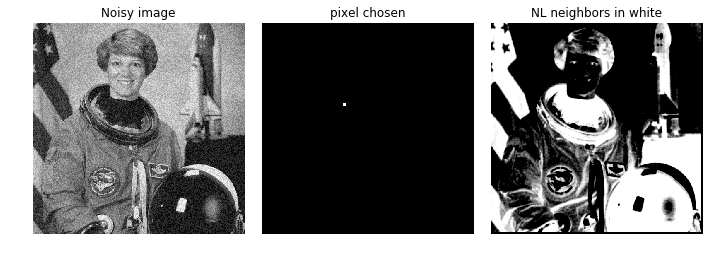

In [160]:
I = np.zeros(nn.shape)
I[200 - 4:200+4,200 - 4:200+4] = 1 

fig3, ax3 = plt.subplots(ncols=3, figsize=(10, 10), sharex=True, sharey=True,
                       subplot_kw={'adjustable': 'box-forced'})
ax3[0].imshow(gnoisy)
ax3[0].axis('off')
ax3[0].set_title("Noisy image")
ax3[1].imshow(I)
ax3[1].axis('off')
ax3[1].set_title("pixel chosen")
ax3[2].imshow(nn)
ax3[2].axis('off')
ax3[2].set_title("NL neighbors in white")

fig3.tight_layout()
plt.gray()
plt.show()

In [ ]:
misc.imsave("images/astro/bwnoise.png")
misc.imsave("images/astro/pixel.png")
misc.imsave("images/astro/bwnn.png")